<a href="https://colab.research.google.com/github/snoop2head/murder_hornet_hunter/blob/master/bee_vs_wasp_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://www.kaggle.com/accountstatus/bee-or-wasp-or-any-others

In [ ]:
!git clone https://github.com/snoop2head/murder_hornet_hunter

Cloning into 'study_in_yellow'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 17841 (delta 2), reused 4 (delta 1), pack-reused 17830
Receiving objects: 100% (17841/17841), 670.85 MiB | 15.90 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (17964/17964), done.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
from random import shuffle
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image as img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
ROOT = './murder_hornet_hunter/kaggle_bee_vs_wasp'
KILLER_ROOT = './murder_hornet_hunter/asian-giant-hornet'

In [ ]:
main_path='./output/bee-vs-wasp'
training_path=main_path+'/training'
testing_path=main_path+'/validation'
bee_training=training_path+'/bee'
wasp_training=training_path+'/wasp'
other_insects_training=training_path+'/other_insects'
other_noinsects_training=training_path+'/other_noinsects'
bee_testing=testing_path+'/bee'
wasp_testing=testing_path+'/wasp'
other_insects_testing=testing_path+'/other_insects'
other_noinsects_testing=testing_path+'/other_noinsects'

In [ ]:
def directory_creation(path):
    os.mkdir(path)


In [ ]:
directory_creation('./output')

In [ ]:
directory_creation(main_path)
directory_creation(training_path)
directory_creation(testing_path)
directory_creation(bee_training)
directory_creation(wasp_training)
directory_creation(other_insects_training)
directory_creation(other_noinsects_training)

In [ ]:
directory_creation(bee_testing)
directory_creation(wasp_testing)
directory_creation(other_insects_testing)
directory_creation(other_noinsects_testing)

In [ ]:
def copy_files(original,dest_training,dest_testing):
    l=os.listdir(original)
    training_length=int(len(l)*0.8)
    shuffle(l)
    for i in range(len(l)):
        if i<training_length:
            shutil.copy(original+'/'+l[i],dest_training)
        else:
            shutil.copy(original+'/'+l[i],dest_testing)


In [ ]:
copy_files(f'{ROOT}/bee1',bee_training,bee_testing)
copy_files(f'{ROOT}/bee2',bee_training,bee_testing)
copy_files(f'{ROOT}/wasp1',wasp_training,wasp_testing)
copy_files(f'{ROOT}/wasp2',wasp_training,wasp_testing)
copy_files(f'{ROOT}/other_insect',other_insects_training,other_insects_testing)
copy_files(f'{ROOT}/other_noinsect',other_noinsects_training,other_noinsects_testing)


In [ ]:
data_generator = ImageDataGenerator(rescale = 1./250,zoom_range = 0.2)

In [ ]:
batch_size = 8 #accessing all our data both training and testing
training_data = data_generator.flow_from_directory(directory = training_path,
                                                  target_size = (150,150),
                                                  batch_size = batch_size,)
testing_data = data_generator.flow_from_directory(directory = testing_path,
                                                  target_size = (150,150),
                                                  batch_size = batch_size)

Found 9134 images belonging to 4 classes.
Found 2287 images belonging to 4 classes.


In [ ]:
model = Sequential() #making our CNN
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_data.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0))
model.add(Dense(units = len(set(training_data.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 126)       7

In [ ]:
fitted_model = model.fit_generator(training_data,
                        steps_per_epoch = 250,
                        epochs = 15,
                        validation_data = testing_data,
                        validation_steps = 1000)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
250/250 [==============================] - 29s 117ms/step - loss: 1.2149 - accuracy: 0.4755 - val_loss: 1.1682 - val_accuracy: 0.5265
Epoch 2/15
250/250 [==============================] - 14s 55ms/step - loss: 1.1284 - accuracy: 0.5440
Epoch 3/15
250/250 [==============================] - 14s 55ms/step - loss: 1.0171 - accuracy: 0.6040
Epoch 4/15
250/250 [==============================] - 14s 55ms/step - loss: 0.9960 - accuracy: 0.5986
Epoch 5/15
250/250 [==============================] - 14s 55ms/step - loss: 0.9576 - accuracy: 0.6000
Epoch 6/15
250/250 [==============================] - 14s 54ms/step - loss: 0.9130 - accuracy: 0.6280
Epoch 7/15
250/250 [==============================] - 14s 56ms/step - loss: 0.8993 - accuracy: 0.6455
Epoch 8/15
250/250 [==============================] - 14s 55ms/step - loss: 0.9279 - accuracy: 0.6310
Epoch 9/15
250/250 [==============================] - 14s 55ms/st

In [ ]:
# now let's save the model so we dont have to train this again
model.save(f'./murder_hornet_hunter/model')

INFO:tensorflow:Assets written to: ./study_in_yellow/model/assets


In [ ]:
# Load model
model = tf.keras.models.load_model(f'./murder_hornet_hunter/model')

In [ ]:
def testing_image(image_directory): #testing out our model
    test_image = img.load_img(image_directory, target_size = (150, 150))
    test_image = img.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][2]==max(result[0]):
        print('Other than insects')
    elif result[0][1]==max(result[0]):
        print('Insects')
    elif result[0][0]==max(result[0]):
        print('Bees')
    else:
        print('oooo its the wasps')


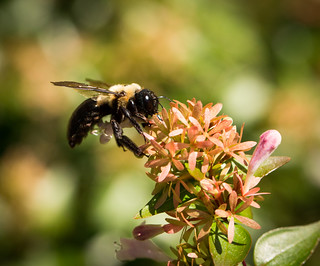

In [ ]:
from IPython.display import Image
Image(f"{ROOT}/bee1/10092043833_7306dfd1f0_n.jpg")

In [ ]:
testing_image(f'{ROOT}/bee1/10092043833_7306dfd1f0_n.jpg')

[[1.000000e+00 1.779284e-28 0.000000e+00 0.000000e+00]]
Bees


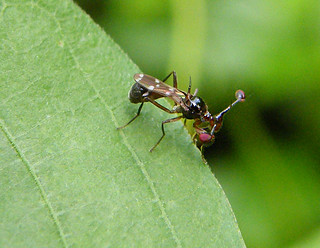

In [ ]:
Image(f'{ROOT}/other_insect/10199076566_2014fdb8a8_n.jpg')

In [ ]:
testing_image(f'{ROOT}/other_insect/10199076566_2014fdb8a8_n.jpg')

[[0. 1. 0. 0.]]
Insects


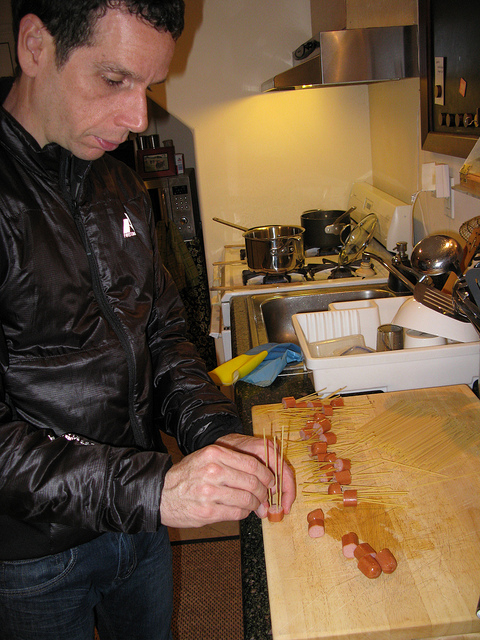

In [ ]:
Image(f'{ROOT}/other_noinsect/501094.jpg')

In [ ]:
testing_image(f'{ROOT}/other_noinsect/501094.jpg')

[[5.0854221e-13 1.8243258e-32 1.0000000e+00 3.9727461e-11]]
Other than insects


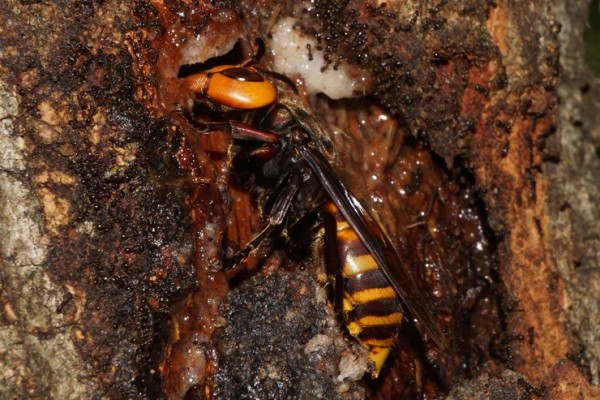

In [ ]:
Image(f'{KILLER_ROOT}/naver_0005.jpg')

In [ ]:
testing_image(f'{KILLER_ROOT}/naver_0003.jpg')

[[0. 0. 0. 1.]]
oooo its the wasps


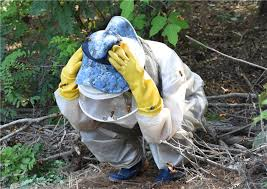

In [ ]:
test_file_name = "google_0016"
test_file_path = f'{KILLER_ROOT}/{test_file_name}.jpg'
hornet_image = Image(test_file_path)
hornet_image

In [ ]:
testing_image(test_file_path)

[[0. 0. 1. 0.]]
Other than insects


/content
